NAME-Sarnalika Paul
REG no: - 23122130
CIA3

AIM OF THIS ASSIGNMENT- Here  we are will classify the pumpkin seeds based on the other features like area parameter etc.For any new types of seeds we can fit this model to classify in which class it can be placed.
                         

Importing Libraries

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load dataset

In [80]:
data = pd.read_csv('Pumpkin_Seeds_Dataset.csv', encoding='latin1')
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


data description

In [81]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [82]:
print(data.shape)


(2500, 13)


In [83]:
data.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object

feature and target variable selection

In [84]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print("Shape of X is %s and shape of y is %s"%(X.shape,y.shape))
y


Shape of X is (2500, 12) and shape of y is (2500,)


0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2500, dtype: object

Split into training and testing set

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


initialising random forest model

In [86]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

fitting the model

In [87]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

predicting with respecting testing value

In [88]:
y_pred = rf_classifier.predict(X_test)


Accuracy score and classification report

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

accuracy_percent=round(accuracy,2)
print("Accuracy is:",accuracy_percent*100,"%")

print(classification_report(y_test, y_pred))

Accuracy: 0.87
Accuracy is: 87.0 %
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.86      0.87       316
Ürgüp Sivrisi       0.86      0.87      0.87       309

     accuracy                           0.87       625
    macro avg       0.87      0.87      0.87       625
 weighted avg       0.87      0.87      0.87       625



Confusion matrix

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [91]:
cm = confusion_matrix(y_test, y_pred)

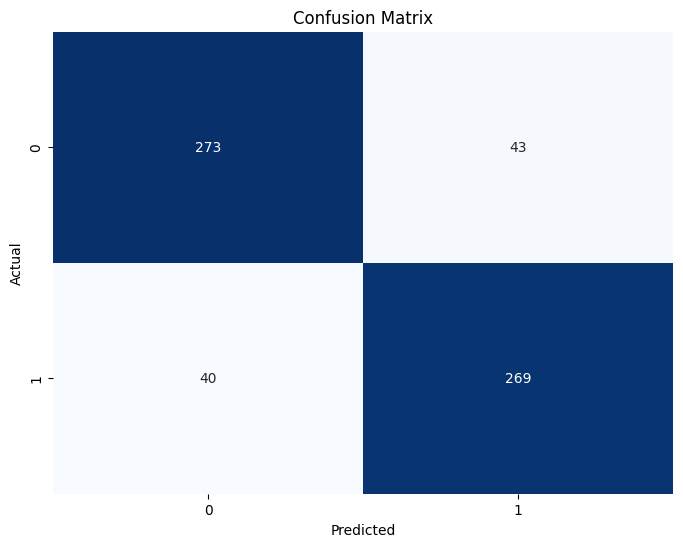

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

to find which features are most important

In [93]:
feature_importances = rf_classifier.feature_importances_


In [94]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [95]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

C:\Users\sabya\AppData\Local\Temp\ipykernel_28728\2327755652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')


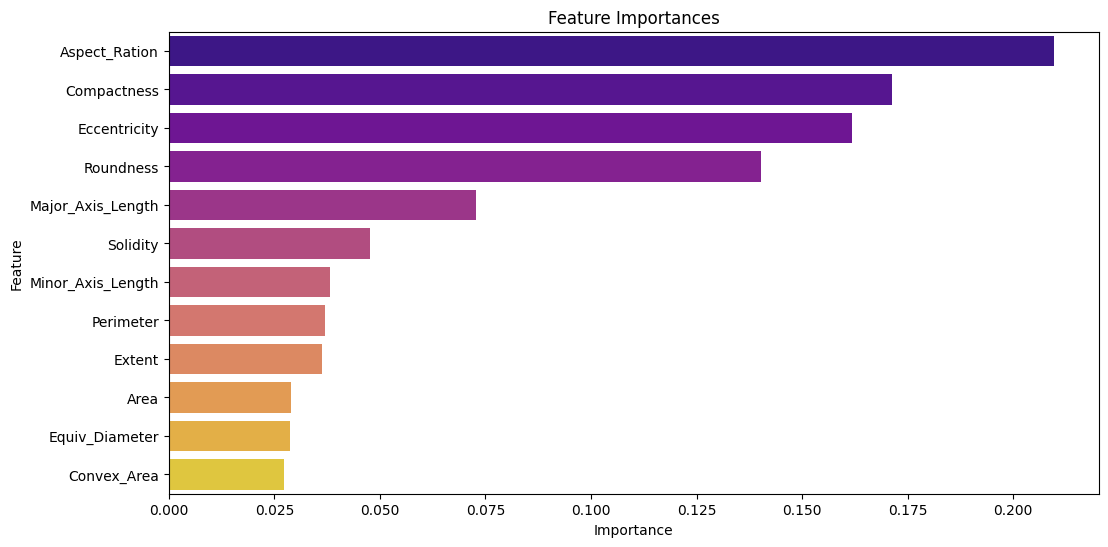

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')
plt.title('Feature Importances')
plt.show()


Scatter plots: Show the relationship between two variables. Patterns such as linear relationships, clusters, or outliers can be visually identified.

Diagonal plots: Show the distribution of individual variables. Histograms represent the distribution of numerical variables, while kernel density estimates provide a smoothed estimate of the probability density function.

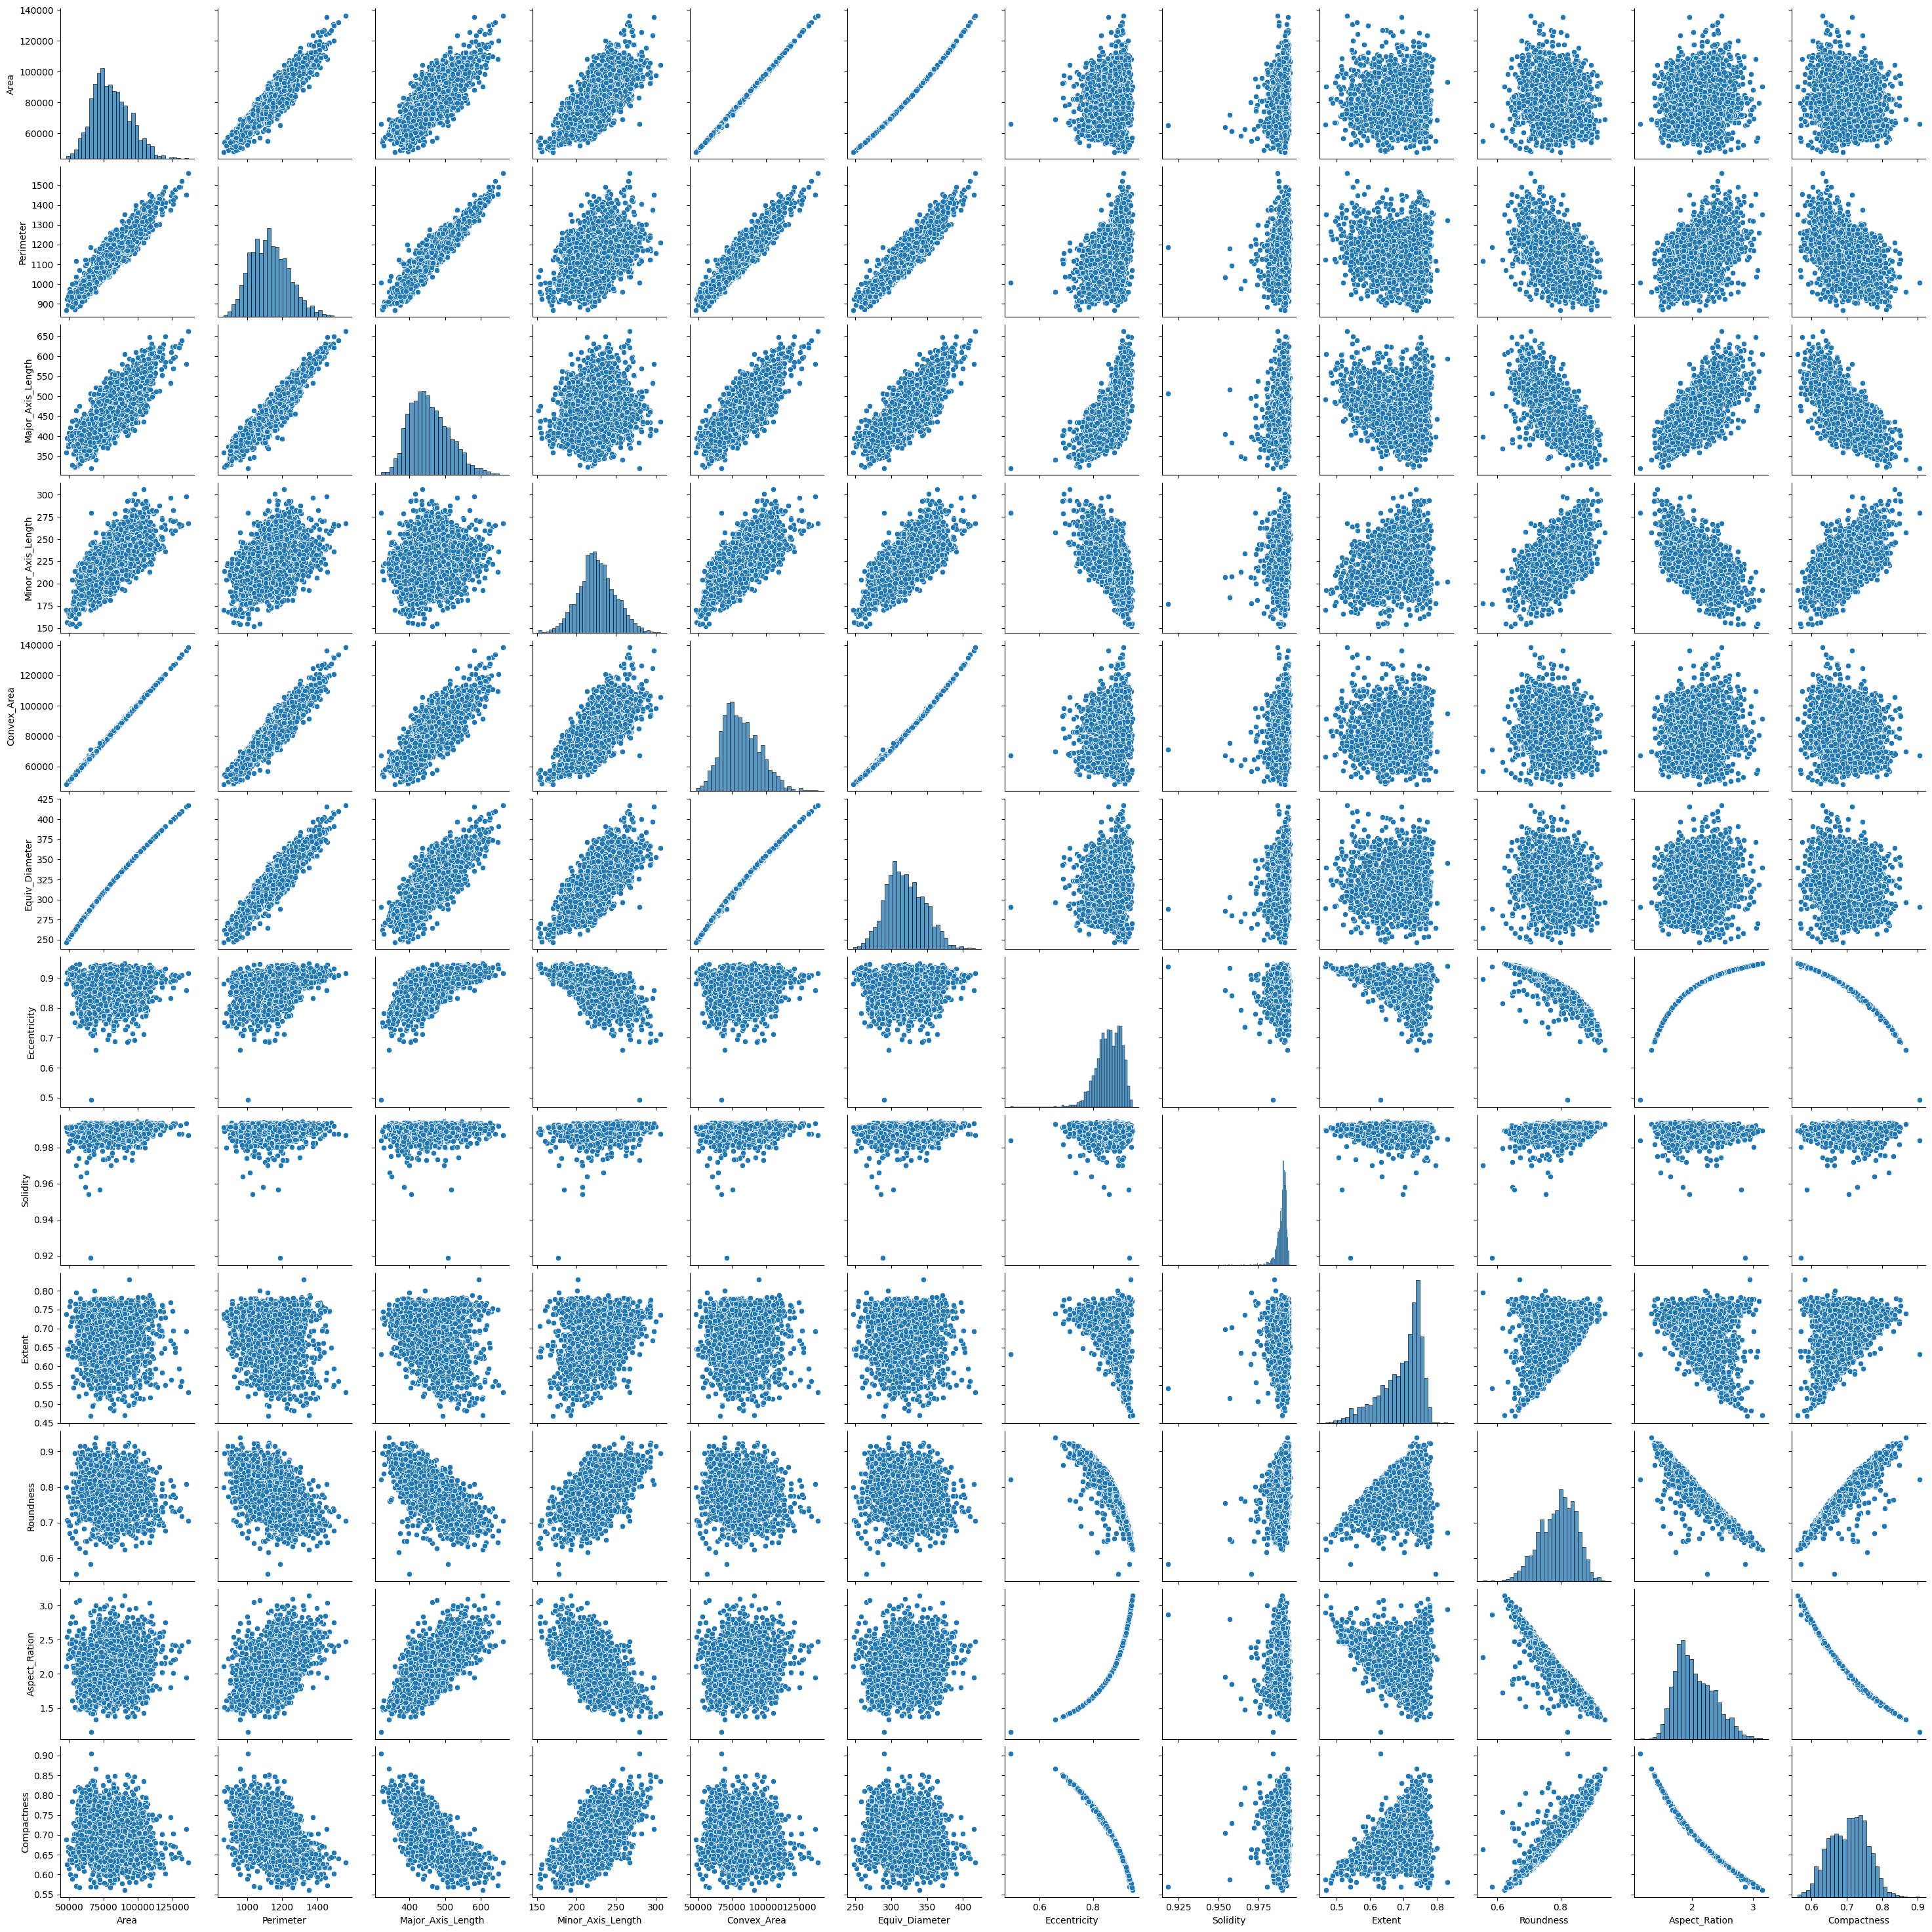

In [97]:
sns.pairplot(data)

To find is there any unique value

In [98]:
# Assuming 'df' is your pandas DataFrame and 'column_name' is the name of the column you want to check
unique_values = data['Class'].unique()

# Print the unique values
print("Unique values in column '{}':".format('Class'))
print(unique_values)


Unique values in column 'Class':
['Çerçevelik' 'Ürgüp Sivrisi']


To print the column name

In [99]:

print(data.columns)


Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')


how amny unique values are there is the column class

In [100]:
# Print unique values in the 'Class' column before mapping
print("Unique values in 'Class' column before mapping:")
print(data['Class'].unique())

# Define the mapping dictionary
mapping_dict = {'Çerçevelik': 1, 'Ürgüp Sivrisi': 0}  # Update with your actual values

# Apply the mapping to the 'Class' column using the map() function and ignore NaN values
data['Class'] = data['Class'].map(mapping_dict, na_action='ignore')

# Print unique values in the 'Class' column after mapping
print("\nUnique values in 'Class' column after mapping:")


print(data['Class'].unique())


Unique values in 'Class' column before mapping:
['Çerçevelik' 'Ürgüp Sivrisi']

Unique values in 'Class' column after mapping:
[1 0]


split inton training and testing dataset

In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

standarized the data:

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


Accuracy score,classification report and confusion matrix

In [103]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', max_iter=1000)
lr.fit(x_train_scaled, y_train)

y_pred = lr.predict(x_test_scaled)
print("Accuracy: {}" .format(accuracy_score(y_pred, y_test)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8693333333333333
               precision    recall  f1-score   support

   Çerçevelik       0.86      0.90      0.88       390
Ürgüp Sivrisi       0.89      0.84      0.86       360

     accuracy                           0.87       750
    macro avg       0.87      0.87      0.87       750
 weighted avg       0.87      0.87      0.87       750

[[351  39]
 [ 59 301]]
